<a href="https://colab.research.google.com/github/AmiraliLalehpour/MMAI869-Pump-it-Up-Competition/blob/main/MMAI869_Pump_It_Up_Data_Cleaning_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MMAI 869, Smith School of Business at Queens University
###Team Broadview Project, Pump it Up: Data Mining the Water Table

###Import Libraries

In [ ]:
import numpy as np  
import pandas as pd  
import datetime as dt

# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score, plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report


from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.utils import compute_class_weight
from sklearn.metrics import plot_roc_curve

from google.colab import drive

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


https://medium.com/analytics-vidhya/predictive-modeling-for-tanzanian-water-pumps-701bcc7760b2

https://towardsdatascience.com/predicting-the-functional-status-of-pumps-in-tanzania-355c9269d0c2

https://rstudio-pubs-static.s3.amazonaws.com/339668_006f4906390e41cea23b3b786cc0230a.html

https://itnext.io/predicting-functional-water-pumps-in-tanzania-using-random-forests-and-logistic-regression-in-ffa04b0617f2

https://towardsdatascience.com/pump-it-up-with-catboost-828bf9eaac68

### Check Allocated System Specs by Google Colab

In [ ]:
from psutil import *

cpu_count()

2

In [ ]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz


In [ ]:
!df -h / |awk '{print $4}'

Avail
85G


In [ ]:
!free -h  --si | awk '/Mem:/{print $2}'

13G


In [ ]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



#1. Loading the dataset from GitHub: [MMAI869-Pump-it-Up-Competition]

  Data is accessed from github: (https://github.com/AmiraliLalehpour/MMAI869-Pump-it-Up-Competition)



In [ ]:
ulr_Training_Set_Values = 'https://raw.githubusercontent.com/AmiraliLalehpour/MMAI869-Pump-it-Up-Competition/main/Training_Set_Values.csv'
ulr_Training_Set_Labels = 'https://raw.githubusercontent.com/AmiraliLalehpour/MMAI869-Pump-it-Up-Competition/main/Training_Set_Labels.csv'
ulr_Test_Set_Values = 'https://raw.githubusercontent.com/AmiraliLalehpour/MMAI869-Pump-it-Up-Competition/main/Test_Set_Values.csv'
Training_Set_Values = pd.read_csv(ulr_Training_Set_Values)
Training_Set_Labels = pd.read_csv(ulr_Training_Set_Labels)
test = pd.read_csv(ulr_Test_Set_Values)
data = Training_Set_Values.merge(Training_Set_Labels, on='id', how='right')

In [ ]:
test_id = pd.read_csv(ulr_Test_Set_Values).id

In [ ]:
original_data = data

In [ ]:
original_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
len(data)

59400

In [ ]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
# data.isnull().sum()

In [ ]:
# test.isnull().sum()

#2- Data Cleaning and Imputation

In [ ]:
# data.info()

##2.1- Numerical Features
Some of these features have misisng values, or zeros, which are same as missing.
We will impute them by mean/median of that feature.
As they are location related, we will group the same locations together and impute over them

In [ ]:
df_numerical_features = data.select_dtypes(exclude='object')
df_numerical_features.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

###2.1.1- amount_tsh
Total static head (amount water available to waterpoint)

https://inspectapedia.com/water/Well_Static_Head_Definition.php

The static head volume inside a water well tells us how much water is available to the pump after the well has rested, water has risen to its maximum height inside the well, and the pump is about to turn on.

* Depending on the unit of measurment for volume, some values might not make sense, we don't have the unit here
* We have 41639 values of zero, need to replace them with some representative number with assumption, i.e. mean/median/mode of other values in the same area.
* Need to remove outliers as well, lets decide which one is considered as outlier. Left them to be for now

In [ ]:
data.amount_tsh.value_counts().sort_values(ascending=False)

0.00        41639
500.00       3102
50.00        2472
1000.00      1488
20.00        1463
            ...  
0.25            1
12.00           1
60000.00        1
306.00          1
59.00           1
Name: amount_tsh, Length: 98, dtype: int64

In [ ]:
test.amount_tsh.value_counts().sort_values(ascending=False)

0.0        10410
500.0        772
50.0         631
1000.0       370
20.0         349
           ...  
60000.0        1
550.0          1
3.0            1
2550.0         1
2800.0         1
Name: amount_tsh, Length: 68, dtype: int64

In [ ]:
data['amount_tsh'].replace(0.0, np.nan, inplace=True)
print('Null values in data', data.amount_tsh.isnull().sum())
test['amount_tsh'].replace(0.0, np.nan, inplace=True)
print('Null values in test', test.amount_tsh.isnull().sum())

Null values in data 41639
Null values in data 10410


In [ ]:
data["amount_tsh"].fillna(data.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
data["amount_tsh"].fillna(data.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
data["amount_tsh"].fillna(data["amount_tsh"].median(), inplace=True)

test["amount_tsh"].fillna(test.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
test["amount_tsh"].fillna(test.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
test["amount_tsh"].fillna(test["amount_tsh"].median(), inplace=True)

In [ ]:
data.groupby(['region', 'district_code', 'amount_tsh']).size()

region  district_code  amount_tsh
Arusha  1              50.0          189
        2              10.0           16
                       20.0          132
                       30.0          846
                       50.0           59
                                    ... 
Tanga   8              20.0           22
                       25.0            2
                       50.0            2
                       150.0           1
                       1000.0        258
Length: 914, dtype: int64

###2.1.2- Coordinates: gps_height, longitude, latitude
Random forest's feature importance shows the geographical location is very important, top of the list.

* longitude and laltitude have 1812 zero values, whih are outside of Tanzania, so they are essentially Nan values. We will perform a KNN to predict them to improve the results.

In [ ]:
data['gps_height'].replace(0.0, np.nan, inplace=True)

test['gps_height'].replace(0.0, np.nan, inplace=True)

In [ ]:
data["gps_height"].fillna(data.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
data["gps_height"].fillna(data["gps_height"].mean(), inplace=True)

test["gps_height"].fillna(test.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
test["gps_height"].fillna(test.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
test["gps_height"].fillna(test["gps_height"].mean(), inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


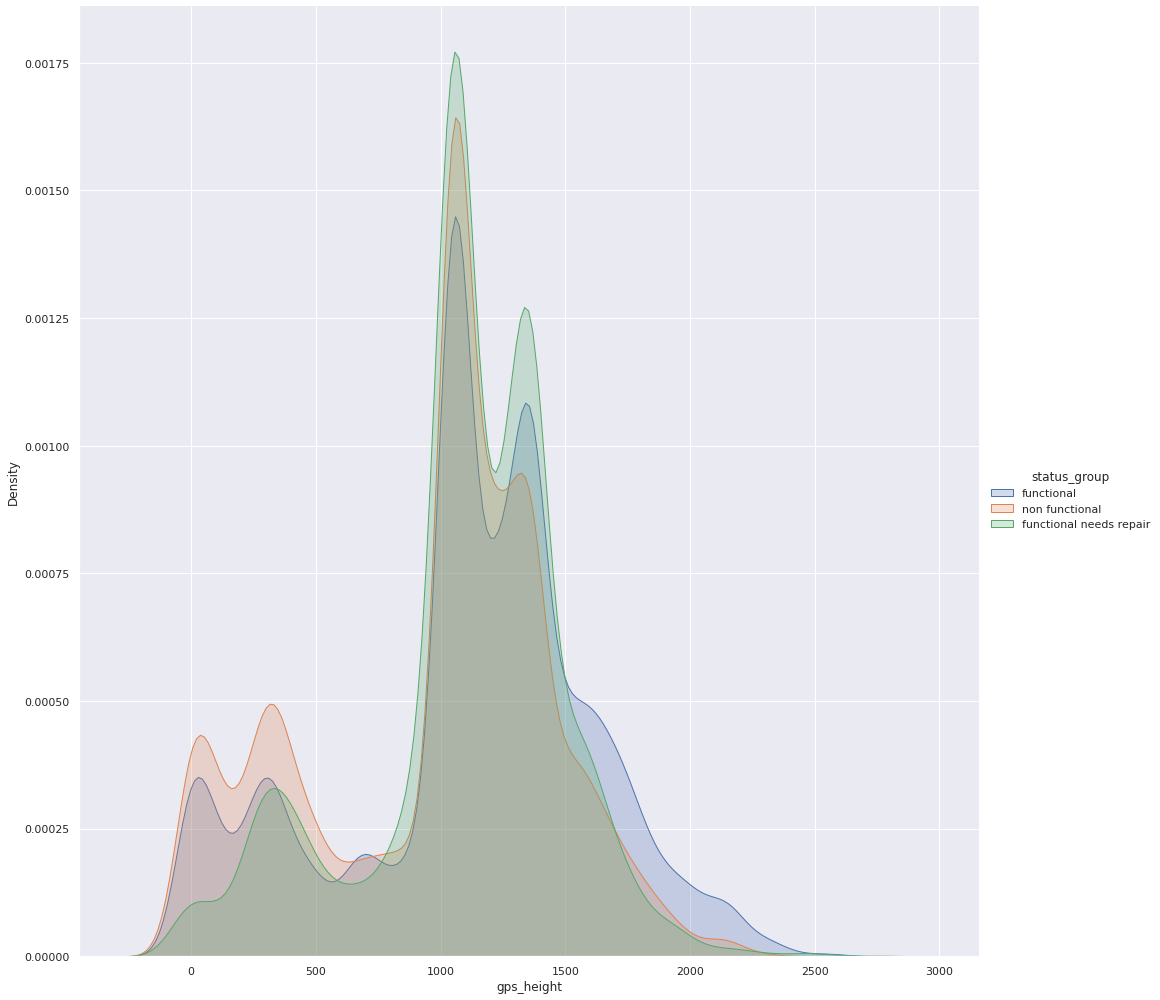

In [ ]:


sns.FacetGrid(data, hue='status_group',size=14).map(sns.kdeplot, 'gps_height', shade=True).add_legend()

In [ ]:
data['longitude'].replace(0.0, np.nan, inplace=True)
data['latitude'].replace(0.0, np.nan, inplace=True)

test['longitude'].replace(0.0, np.nan, inplace=True)
test['latitude'].replace(0.0, np.nan, inplace=True)

In [ ]:
data.groupby(['district_code', 'region','construction_year']).size() 

district_code  region     construction_year
0              Dodoma     0                     23
1              Arusha     0                      3
                          1980                   2
                          1990                  23
                          2000                 137
                                              ... 
63             Mtwara     2011                   2
                          2012                   8
               Pwani      0                     37
67             Pwani      0                      6
80             Shinyanga  0                     12
Length: 2374, dtype: int64

In [ ]:
data["latitude"].fillna(data.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
data["longitude"].fillna(data.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
data["longitude"].fillna(data.groupby(['region'])["longitude"].transform("mean"), inplace=True)

test["latitude"].fillna(test.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
test["longitude"].fillna(test.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
test["longitude"].fillna(test.groupby(['region'])["longitude"].transform("mean"), inplace=True)

###2.1.4- population
Population around the well.


In [ ]:
data['population'].replace(0.0, np.nan, inplace=True)

test['population'].replace(0.0, np.nan, inplace=True)

In [ ]:
data["population"].fillna(data.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
data["population"].fillna(data.groupby(['region'])["population"].transform("median"), inplace=True)
data["population"].fillna(data["population"].median(), inplace=True)

test["population"].fillna(test.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
test["population"].fillna(test.groupby(['region'])["population"].transform("median"), inplace=True)
test["population"].fillna(test["population"].median(), inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


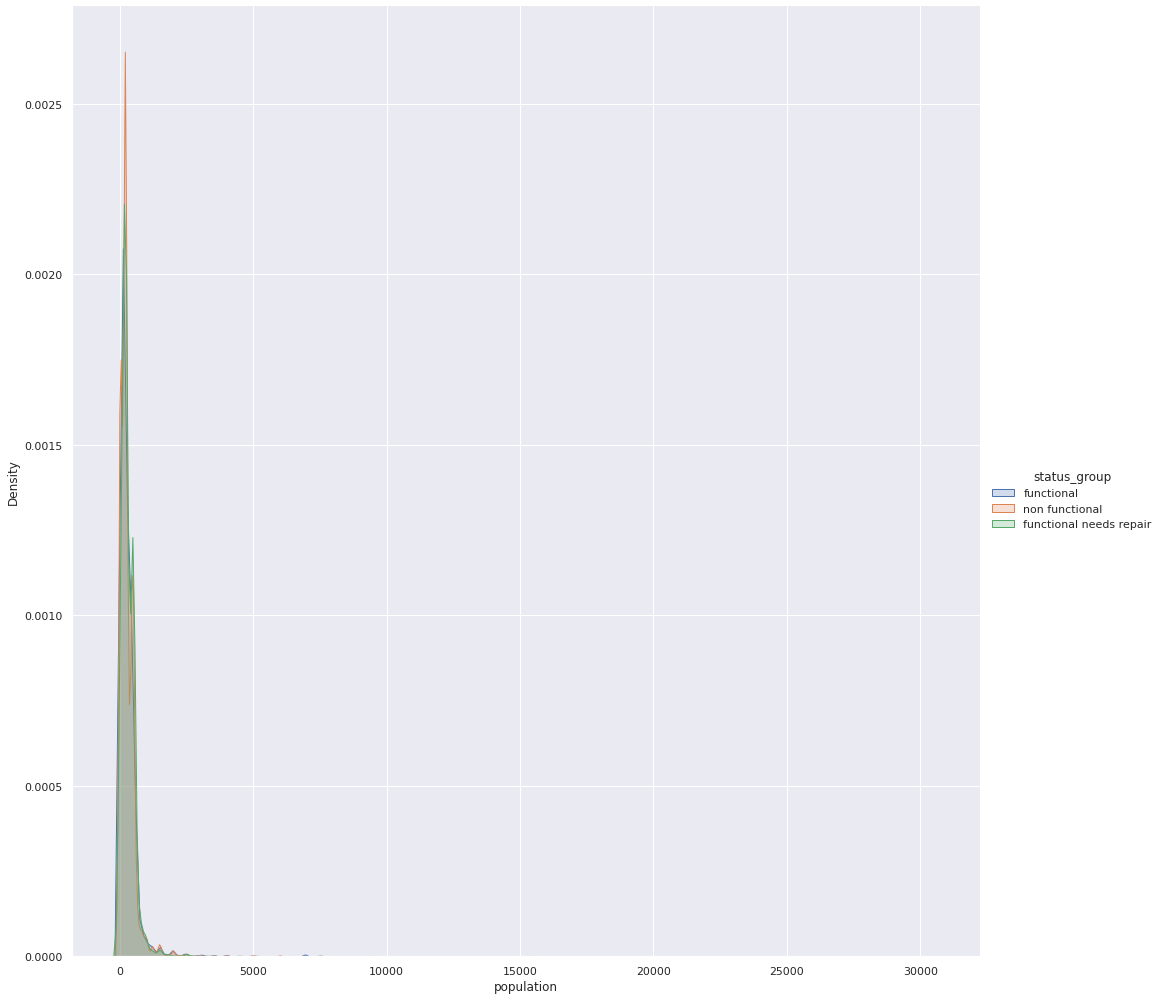

In [ ]:
sns.FacetGrid(data, hue='status_group',size=14).map(sns.kdeplot, 'population', shade=True).add_legend()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


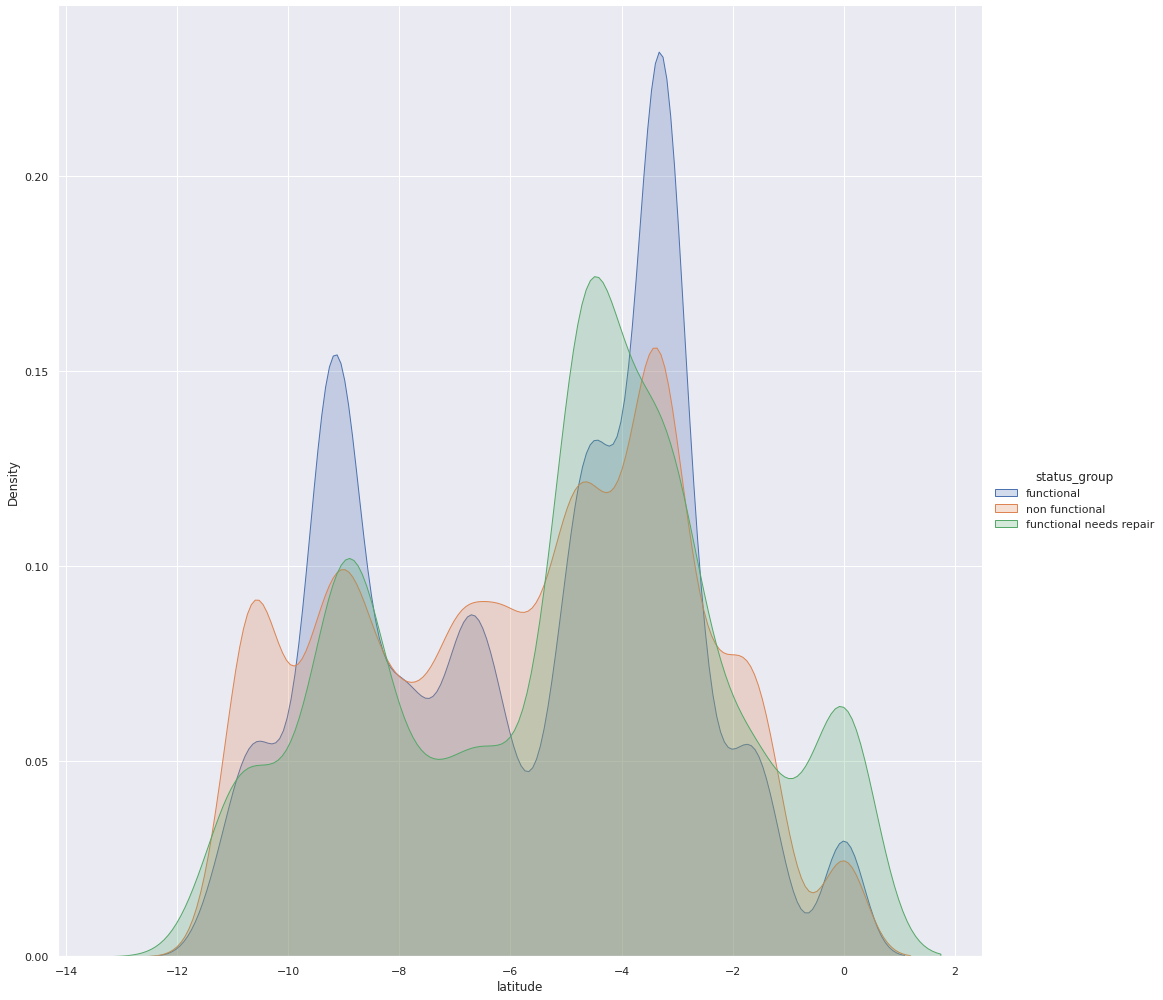

In [ ]:
sns.FacetGrid(data, hue='status_group',size=14).map(sns.kdeplot, 'latitude', shade=True).add_legend()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


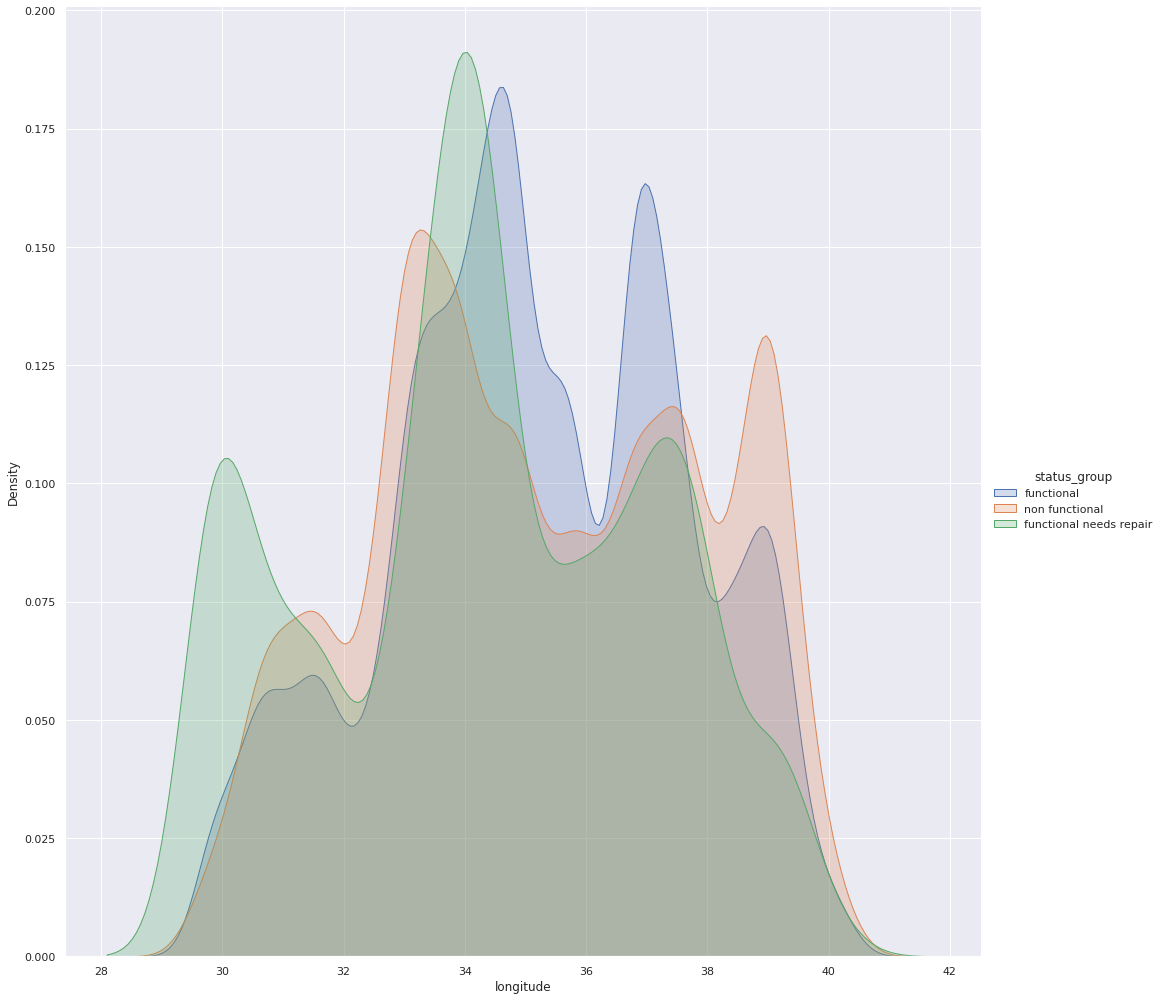

In [ ]:
sns.FacetGrid(data, hue='status_group',size=14).map(sns.kdeplot, 'longitude', shade=True).add_legend()

In [ ]:
features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
data[features] = scaler.fit_transform(data[features])
data[features].head(20)
data.isnull().sum()

##2.2- Categorical Features

Categorical features can have so many instances that happen only a few times or even once. This is not very informative for an ML model. 

This can lead to high cardinality.

Infrequent labels are so few, that it is hard to derive reliable information from them. But more importantly, infrequent labels tend to appear only on train set or only on the test set, leading to:

*   If only on the train set, they may cause over-fitting
*   If only on the test set, our machine learning model will not know how to score them

The identification of rare labels should be done using only the training set, and then propagated to the test set. Rare labels should be identified in the training set only. 

Some features are also highly cardinal but some have missing values as well. We will create a "Missing" category for them since there are so many NaN. We will use rare lable encoding to deal with high cardinality, which has to be done in feature engineering stage.

https://github.com/solegalli/feature-engineering-for-machine-learning/blob/main/Section-06-Categorical-Encoding/06.10-Engineering-Rare-Categories.ipynb


In [ ]:
df_categorical_features = data.select_dtypes(include='object')
df_categorical_features.columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [ ]:
# df_categorical_features.isnull().sum()

In [ ]:
data.basin.value_counts().sort_values(ascending=False)

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

Text(0, 0.5, 'Number of Occurance')

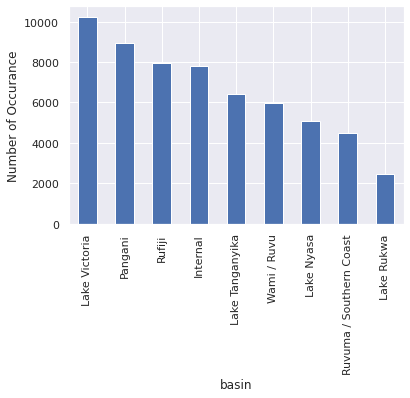

In [ ]:
data.basin.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('basin')
plt.ylabel('Number of Occurance')

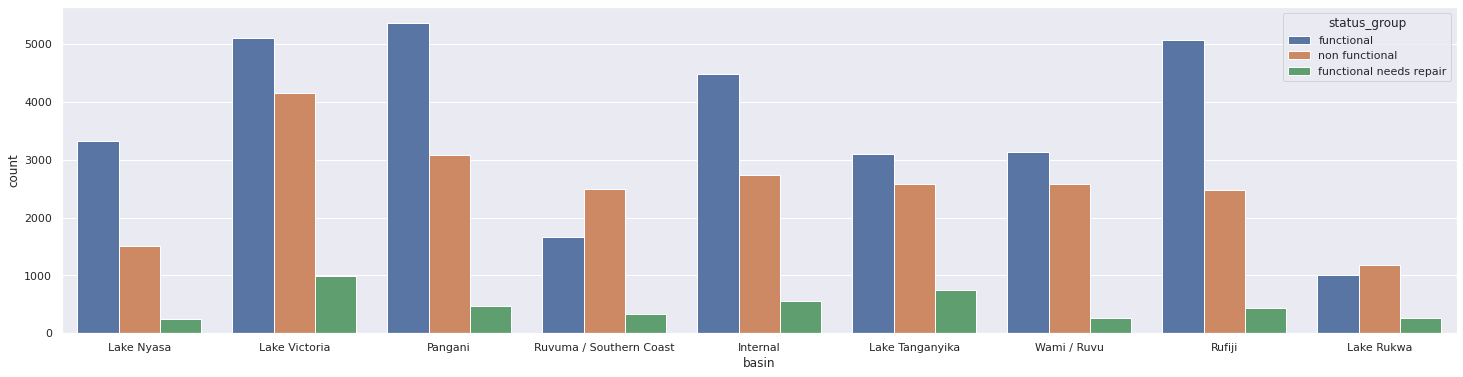

In [ ]:
# distribution over the target
plt.figure(figsize=(25, 6))

sns.countplot(data=data,x='basin',hue='status_group')

Text(0, 0.5, 'Number of Occurance')

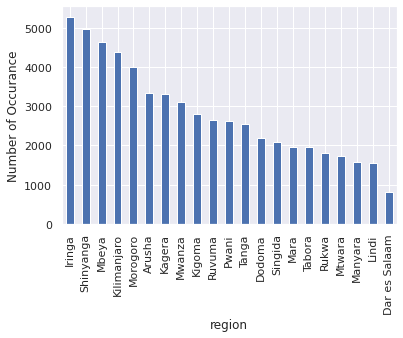

In [ ]:
data.region.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('region')
plt.ylabel('Number of Occurance')

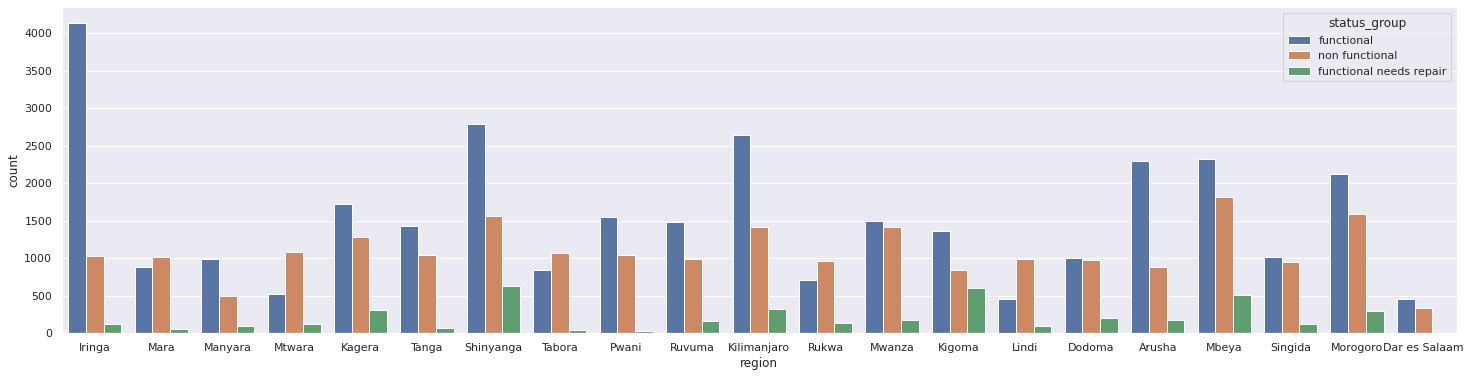

In [ ]:
# distribution over the target
plt.figure(figsize=(25, 6))

sns.countplot(data=data,x='region',hue='status_group')

In [ ]:
data.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [ ]:
#The info brought by region_code is already given by region utself and we also have district_code for more specific location. So drop region_code
print(data.groupby(['region_code', 'status_group']).size())

region_code  status_group           
1            functional                 1009
             functional needs repair     209
             non functional              983
2            functional                 1978
             functional needs repair     174
                                        ... 
90           functional needs repair      98
             non functional              625
99           functional                  191
             functional needs repair       7
             non functional              225
Length: 79, dtype: int64


In [ ]:
data.drop('region_code',axis=1,inplace=True)

test.drop('region_code',axis=1,inplace=True)

In [ ]:
data.lga.value_counts().sort_values(ascending=False)

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [ ]:
print(data.groupby(['lga', 'ward','status_group']).size())
print(data.groupby(['lga', 'ward']).size())

lga           ward     status_group           
Arusha Rural  Bangata  functional                 21
                       functional needs repair     2
                       non functional             10
              Bwawani  functional                 12
                       non functional             25
                                                  ..
Uyui          Ufuluma  non functional             10
              Upuge    functional                  7
                       non functional             11
              Usagali  functional                  8
                       non functional             17
Length: 5070, dtype: int64
lga           ward      
Arusha Rural  Bangata        33
              Bwawani        37
              Ilkiding'a     86
              Kimnyaki       79
              Kiranyi       115
                           ... 
Uyui          Ndono          12
              Shitage         3
              Ufuluma        16
              Upuge          1

In [ ]:
# data.drop('ward',axis=1,inplace=True)

# test.drop('ward',axis=1,inplace=True)

In [ ]:
#Check for missing values in funder
df_categorical_features.funder.isnull().sum()

3635

In [ ]:
data.groupby(['installer', 'funder','status_group']).size() 

installer       funder                  status_group           
-               Government Of Tanzania  functional                   1
                                        non functional               1
                Kalebejo Parish         functional                   1
0               0                       functional                 445
                                        functional needs repair      3
                                                                  ... 
wizara ya maji  Serikali                functional                   2
world           World Bank              functional needs repair      1
                                        non functional               3
world banks     World Bank              non functional               1
world vision    World Vision            functional                   1
Length: 5188, dtype: int64

In [ ]:
data.funder.fillna('Missing', inplace=True)

test.funder.fillna('Missing', inplace=True)

In [ ]:
data.funder.value_counts().sort_values(ascending=False)

Government Of Tanzania     9084
Missing                    3635
Danida                     3114
Hesawa                     2202
Rwssp                      1374
                           ... 
Owner Pingo C                 1
Mzee Salum Bakari Darus       1
Masista                       1
Dasp Ltd                      1
Samlo                         1
Name: funder, Length: 1898, dtype: int64

In [ ]:
#Check for missing values in installer
df_categorical_features.installer.isnull().sum()

3655

In [ ]:
data.groupby(['installer','status_group']).size() 

installer       status_group           
-               functional                   2
                non functional               1
0               functional                 445
                functional needs repair      3
                non functional             329
                                          ... 
wizara ya maji  functional                   2
world           functional needs repair      1
                non functional               3
world banks     non functional               1
world vision    functional                   1
Length: 3087, dtype: int64

In [ ]:
data.drop('installer',axis=1,inplace=True)

test.drop('installer',axis=1,inplace=True)

In [ ]:
# data.installer.fillna('Missing', inplace=True)
# test.installer.fillna('Missing', inplace=True)

In [ ]:
# data.installer = data.installer.str.lower()

In [ ]:
# test.installer = data.installer.str.lower()

wpt_name has many 'none' values, we will change them to NaN and replace them with a category called missing, this can be done now before spliting.

In [ ]:
wpt_name_none_index = data[data.wpt_name=='none'].id.tolist()
data.loc[data['id'].isin(wpt_name_none_index), 'wpt_name']= np.NaN

In [ ]:
# wpt_name_test_none_index = test[test.wpt_name=='none'].id.tolist()
# test.loc[test['id'].isin(wpt_name_test_none_index), 'wpt_name']= np.NaN

In [ ]:
# data.wpt_name.fillna('Missing', inplace=True)
# test.wpt_name.fillna('Missing', inplace=True)

In [ ]:
# data.wpt_name.value_counts().sort_values(ascending=False)

In [ ]:
# this feature has onle one occurance per label, need to drop it then.
data.groupby(['wpt_name','status_group']).size() 

wpt_name           status_group  
24                 non functional    1
A Kulwa            non functional    1
A Saidi            functional        1
Abass              functional        1
Abbas              functional        1
                                    ..
Zumbawanu Shuleni  functional        1
Zungu              functional        1
Zunguni            non functional    1
Zunzuli A Shuleni  non functional    1
Zuwena Kindo       non functional    1
Length: 40549, dtype: int64

In [ ]:
data.drop('wpt_name',axis=1,inplace=True)

test.drop('wpt_name',axis=1,inplace=True)

In [ ]:
data.subvillage.isnull().sum()

371

In [ ]:
# This feature cannot be valuable as the count per label is so sparse
data.groupby(['subvillage','status_group']).size()

subvillage  status_group           
##          functional                  1
'A' Kati    non functional              1
1           functional                 52
            functional needs repair     8
            non functional             72
                                       ..
Zunga       functional                  1
Zunguni     non functional              1
Zunzuli     functional                  1
            non functional              3
Zuri        non functional              1
Length: 25682, dtype: int64

In [ ]:
#management_group is not informative
data.drop('subvillage',axis=1,inplace=True)

test.drop('subvillage',axis=1,inplace=True)

In [ ]:
print(data.groupby(['management', 'management_group']).size() )

management        management_group
company           commercial            685
other             other                 844
other - school    other                  99
parastatal        parastatal           1768
private operator  commercial           1971
trust             commercial             78
unknown           unknown               561
vwc               user-group          40507
water authority   commercial            904
water board       user-group           2933
wua               user-group           2535
wug               user-group           6515
dtype: int64


In [ ]:
data.drop('management_group',axis=1,inplace=True)

test.drop('management_group',axis=1,inplace=True)

In [ ]:
data.scheme_management.isnull().sum()

3877

In [ ]:
# Not much info is coming from the first 2 features
data.groupby(['extraction_type_group','extraction_type_class','extraction_type']).size()  

extraction_type_group  extraction_type_class  extraction_type          
afridev                handpump               afridev                       1770
gravity                gravity                gravity                      26780
india mark ii          handpump               india mark ii                 2400
india mark iii         handpump               india mark iii                  98
mono                   motorpump              mono                          2865
nira/tanira            handpump               nira/tanira                   8154
other                  other                  other                         6430
other handpump         handpump               other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
other motorpump        motorpump     

In [ ]:
data.drop('extraction_type_group',axis=1,inplace=True)
data.drop('extraction_type_class',axis=1,inplace=True)

test.drop('extraction_type_group',axis=1,inplace=True)
test.drop('extraction_type_class',axis=1,inplace=True)

In [ ]:
data.groupby(['scheme_management', 'scheme_name']).size() 

scheme_management  scheme_name              
Company            BFFS                           1
                   Bagamoyo Wate                 60
                   Bagamoyo wate                210
                   Borehole                       1
                   Borehole drilling project      1
                                               ... 
Water authority    Yongoma                       16
                   Zepalama                       5
                   no scheme                      9
                   pump                           2
                   water supply at Kalebejo       1
Length: 3077, dtype: int64

In [ ]:
data.drop('scheme_name',axis=1,inplace=True)

test.drop('scheme_name',axis=1,inplace=True)

In [ ]:
data.scheme_management.fillna('Missing', inplace=True)
test.scheme_management.fillna('Missing', inplace=True)

In [ ]:
data.scheme_management.value_counts().sort_values(ascending=False)

VWC                 36793
WUG                  5206
Missing              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

scheme_management has one 'none' value in training set only, we will replace it with the "other" cateory.

In [ ]:
scheme_management_none_index = data[data.scheme_management=='None'].id.tolist()
data.loc[data['id'].isin(scheme_management_none_index), 'scheme_management']= 'Other'

Text(0, 0.5, 'Number of Occurance')

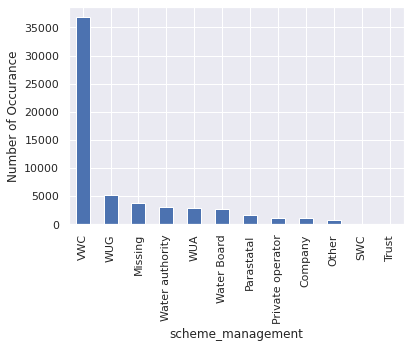

In [ ]:
data.scheme_management.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('scheme_management')
plt.ylabel('Number of Occurance')

In [ ]:
data.groupby(['payment', 'payment_type']).size() 

payment                payment_type
never pay              never pay       25348
other                  other            1054
pay annually           annually         3642
pay monthly            monthly          8300
pay per bucket         per bucket       8985
pay when scheme fails  on failure       3914
unknown                unknown          8157
dtype: int64

In [ ]:
data.drop('payment',axis=1,inplace=True)

test.drop('payment',axis=1,inplace=True)

In [ ]:
data.groupby(['water_quality', 'quality_group']).size() 

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

In [ ]:
data.drop('quality_group',axis=1,inplace=True)

test.drop('quality_group',axis=1,inplace=True)

In [ ]:
data.groupby(['quantity', 'quantity_group']).size() 

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

In [ ]:
data.drop('quantity_group',axis=1,inplace=True)

test.drop('quantity_group',axis=1,inplace=True)

In [ ]:
data.groupby(['source', 'source_type', 'source_class']).size() 

source                source_type           source_class
dam                   dam                   surface           656
hand dtw              borehole              groundwater       874
lake                  river/lake            surface           765
machine dbh           borehole              groundwater     11075
other                 other                 unknown           212
rainwater harvesting  rainwater harvesting  surface          2295
river                 river/lake            surface          9612
shallow well          shallow well          groundwater     16824
spring                spring                groundwater     17021
unknown               other                 unknown            66
dtype: int64

In [ ]:
data.drop('source_type',axis=1,inplace=True)
data.drop('source_class',axis=1,inplace=True)

test.drop('source_type',axis=1,inplace=True)
test.drop('source_class',axis=1,inplace=True)

In [ ]:
data.groupby(['waterpoint_type', 'waterpoint_type_group']).size() 

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              116
communal standpipe           communal standpipe       28522
communal standpipe multiple  communal standpipe        6103
dam                          dam                          7
hand pump                    hand pump                17488
improved spring              improved spring            784
other                        other                     6380
dtype: int64

In [ ]:
data.drop('waterpoint_type_group',axis=1,inplace=True)

test.drop('waterpoint_type_group',axis=1,inplace=True)

###2.2.4- Boolian Features, with Missing Values: public_meeting, permit

In [ ]:
data.public_meeting.isnull().sum()

3334

In [ ]:
data.public_meeting.fillna('Missing', inplace=True)
test.public_meeting.fillna('Missing', inplace=True)

In [ ]:
data.public_meeting = data.public_meeting.replace({True: 'Yes', False: 'No'})

In [ ]:
test.public_meeting = test.public_meeting.replace({True: 'Yes', False: 'No'})

In [ ]:
data.groupby(['public_meeting', 'status_group']).size() 

public_meeting  status_group           
Missing         functional                  1678
                functional needs repair      156
                non functional              1500
No              functional                  2173
                functional needs repair      442
                non functional              2440
Yes             functional                 28408
                functional needs repair     3719
                non functional             18884
dtype: int64

Text(0, 0.5, 'Number of Occurance')

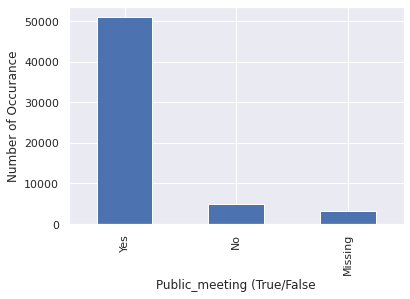

In [ ]:
data.public_meeting.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Public_meeting (True/False')
plt.ylabel('Number of Occurance')

In [ ]:
data.permit.isnull().sum()

3056

In [ ]:
data.permit.fillna('Missing', inplace=True)

test.permit.fillna('Missing', inplace=True)

In [ ]:
data.permit = data.permit.replace({True: 'Yes', False: 'No'})

test.permit = test.permit.replace({True: 'Yes', False: 'No'})

Text(0, 0.5, 'Number of Occurance')

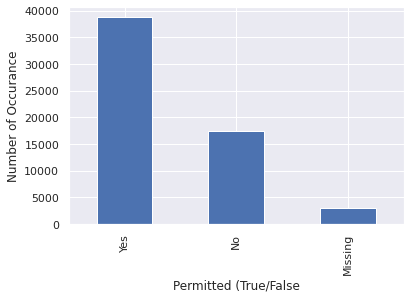

In [ ]:
data.permit.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Permitted (True/False')
plt.ylabel('Number of Occurance')

In [ ]:
data.groupby(['permit', 'status_group']).size() 

permit   status_group           
Missing  functional                  1673
         functional needs repair      300
         non functional              1083
No       functional                  9045
         functional needs repair     1320
         non functional              7127
Yes      functional                 21541
         functional needs repair     2697
         non functional             14614
dtype: int64

In [ ]:
# data.drop('public_meeting', axis=1, inplace=True)
# data.drop('permit', axis=1, inplace=True)

###2.2.5- No value features
Some categorical features have only one unique instance

In [ ]:
data.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [ ]:
data = data.drop(['recorded_by'], axis=1)
test = test.drop(['recorded_by'], axis=1)

In [ ]:
data = data.drop(['num_private'], axis=1)
test = test.drop(['num_private'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   date_recorded      59400 non-null  object 
 3   funder             59400 non-null  object 
 4   gps_height         59400 non-null  float64
 5   longitude          59400 non-null  float64
 6   latitude           59400 non-null  float64
 7   basin              59400 non-null  object 
 8   region             59400 non-null  object 
 9   district_code      59400 non-null  int64  
 10  lga                59400 non-null  object 
 11  ward               59400 non-null  object 
 12  population         59400 non-null  float64
 13  public_meeting     59400 non-null  object 
 14  scheme_management  59400 non-null  object 
 15  permit             59400 non-null  object 
 16  construction_year  594

##2.3- Date and Time Features

###2.3.1. date_recorded
The date the row was entered
* Date recorded does not add much value by itself, we might only need the year. So, only the year row was entere is keeped. The other info of the feature can be used to find the day of the week, month, season, etc. of row recorded. The season might add some vale since it can be rainy or dry season in Tanzania. We will extract the season by percipitation amounts and add it as a new feature to the dataset. 
*Percipitation amount around the date the row was recorded can be valuable info, percipitation_amount above 100mm is assumed "high" and lower than 100mm assumed "low", indicating rainy and dry seasons. 

In [ ]:
data.date_recorded.isnull().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   date_recorded      59400 non-null  object 
 3   funder             59400 non-null  object 
 4   gps_height         59400 non-null  float64
 5   longitude          59400 non-null  float64
 6   latitude           59400 non-null  float64
 7   basin              59400 non-null  object 
 8   region             59400 non-null  object 
 9   district_code      59400 non-null  int64  
 10  lga                59400 non-null  object 
 11  ward               59400 non-null  object 
 12  population         59400 non-null  float64
 13  public_meeting     59400 non-null  object 
 14  scheme_management  59400 non-null  object 
 15  permit             59400 non-null  object 
 16  construction_year  594

In [ ]:
data.groupby(['region', 'district_code', 'construction_year']).size()

region  district_code  construction_year
Arusha  1              0                      3
                       1980                   2
                       1990                  23
                       2000                 137
                       2010                  24
                                           ... 
Tanga   8              2007                  36
                       2008                  24
                       2009                  26
                       2010                  11
                       2011                   4
Length: 2374, dtype: int64

In [ ]:
data.date_recorded = pd.to_datetime(data.date_recorded)
test.date_recorded = pd.to_datetime(test.date_recorded)

In [ ]:
data['year_recorded'] = data.date_recorded.dt.year
test['year_recorded'] = test.date_recorded.dt.year

In [ ]:
data['month_recorded'] = data.date_recorded.dt.month
test['month_recorded'] = test.date_recorded.dt.month

In [ ]:
data['day_recorded'] = data.date_recorded.dt.weekday
test['day_recorded'] = test.date_recorded.dt.weekday

In [ ]:
data['quarer_recorded'] = data.date_recorded.dt.quarter
test['quarer_recorded'] = test.date_recorded.dt.quarter

In [ ]:
data = data.drop(['date_recorded'],axis=1)
test = test.drop(['date_recorded'],axis=1)

In [ ]:
data['percipitation_class'] = data['month_recorded']
data['percipitation_class']=0
test['percipitation_class'] = test['month_recorded']
test['percipitation_class']=0

In [ ]:

data['percipitation_class'] = np.where((data['month_recorded'] == 1), 4, data['percipitation_class'])
data['percipitation_class'] = np.where((data['month_recorded'] == 3), 4, data['percipitation_class'])
data['percipitation_class'] = np.where((data['month_recorded'] == 12), 3, data['percipitation_class'])
data['percipitation_class'] = np.where((data['month_recorded'] == 2), 2, data['percipitation_class'])
data['percipitation_class'] = np.where((data['month_recorded'] == 4), 2, data['percipitation_class'])
data['percipitation_class'] = np.where((data['month_recorded'] == 11), 1, data['percipitation_class'])

In [ ]:
test['percipitation_class'] = np.where((test['month_recorded'] == 1), 4, test['percipitation_class'])
test['percipitation_class'] = np.where((test['month_recorded'] == 3), 4, test['percipitation_class'])
test['percipitation_class'] = np.where((test['month_recorded'] == 12), 3, test['percipitation_class'])
test['percipitation_class'] = np.where((test['month_recorded'] == 2), 2, test['percipitation_class'])
test['percipitation_class'] = np.where((test['month_recorded'] == 4), 2, test['percipitation_class'])
test['percipitation_class'] = np.where((test['month_recorded'] == 11), 1, test['percipitation_class'])

###2.1.10- construction_year
The year the waterpoint was constructed. This feature has so many 0 values, 20709, that does not make sense. The next most frequent year is 2645, the ratio to the next frequent i about 10 times. Replacing the year zero that we assume that are missing data, with any specific year in the dataset, mean /mode will skew the distribution drastically and will over represent one class. Thus, doing so is not adding any value to the model.

As an easy and initial solution, We will distribute them over all years to keep the distribution, based on ratio of those year in the total number of years. We will also add an indicating feature to flag the imputed year to the model.

After, we will do multivariate encoding to guess the year based on other features.

* This step has to happen after test and train split so our model does not overfit and give us misleading results.
* we can calculate the age of the well at the date of recording the row.


In [ ]:
print(round(20709/59400*100,1), 'of data for construction_year is missing')

34.9 of data for construction_year is missing


In [ ]:
# data['construction_year'].replace(0.0, np.nan, inplace=True)
construction_year_zero_index = data[data.construction_year == 0 ].id.tolist()
data.loc[data['id'].isin(construction_year_zero_index), 'construction_year']= np.NaN

In [ ]:
construction_year_zero_index_test = test[test.construction_year == 0 ].id.tolist()
test.loc[test['id'].isin(construction_year_zero_index_test), 'construction_year']= np.NaN

In [ ]:
data["construction_year"].fillna(data.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['region'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
data["construction_year"].fillna(data["construction_year"].median(), inplace=True)

In [ ]:
test["construction_year"].fillna(test.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
test["construction_year"].fillna(test.groupby(['region'])["construction_year"].transform("median"), inplace=True)
test["construction_year"].fillna(test.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
test["construction_year"].fillna(test["construction_year"].median(), inplace=True)

In [ ]:
data['well_age'] = data.year_recorded - data.construction_year

test['well_age'] = test.year_recorded - test.construction_year

Text(0, 0.5, 'Number of Occurance')

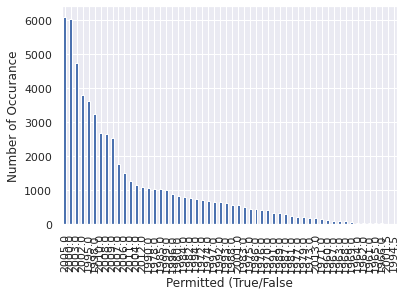

In [ ]:
data.construction_year.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Permitted (True/False')
plt.ylabel('Number of Occurance')

Text(0, 0.5, 'Number of Occurance')

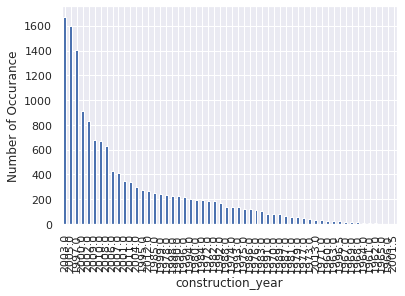

In [ ]:
test.construction_year.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('construction_year')
plt.ylabel('Number of Occurance')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


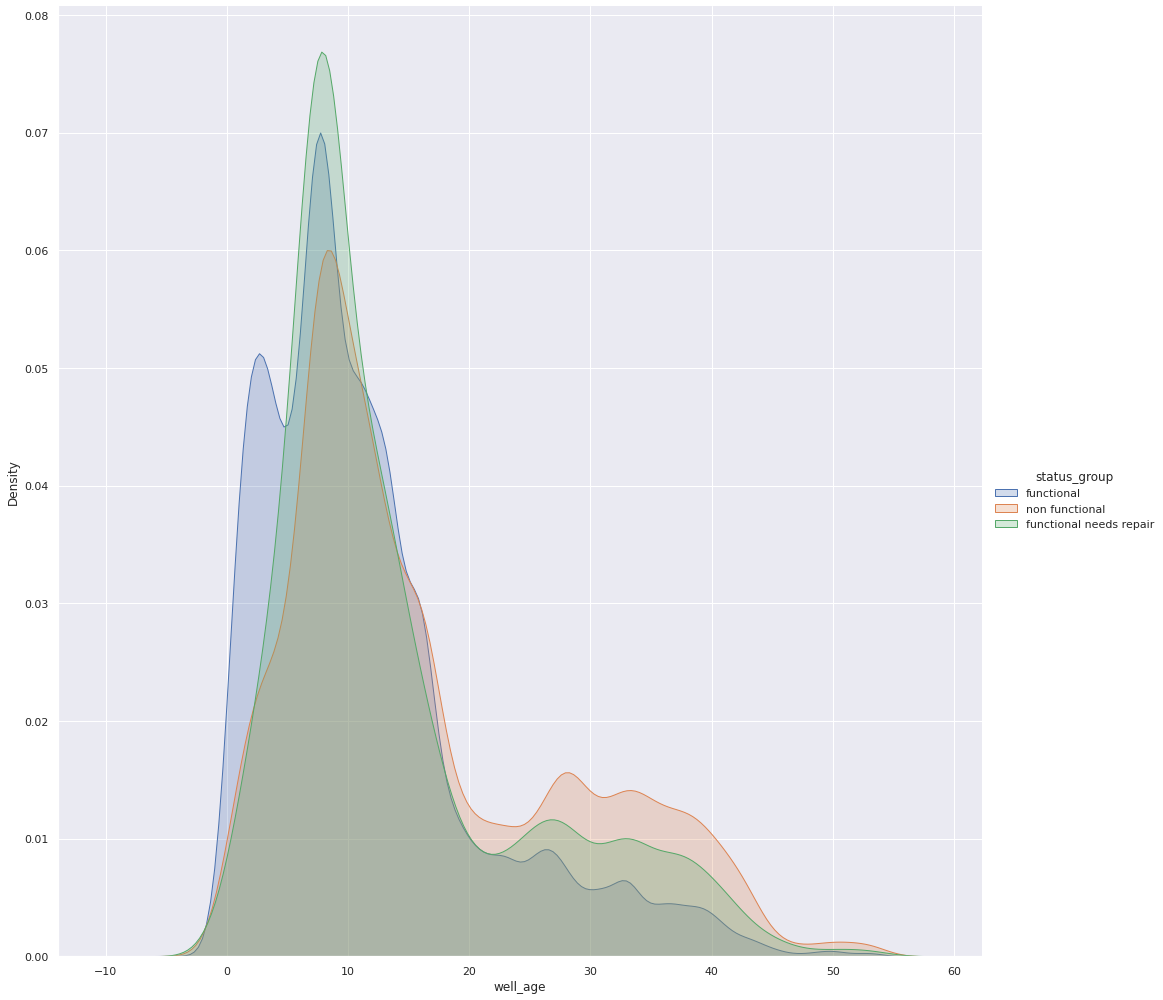

In [ ]:
(sns.FacetGrid(data, hue='status_group',size=14).map(sns.kdeplot, 'well_age', shade=True).add_legend())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   59400 non-null  int64  
 1   amount_tsh           59400 non-null  float64
 2   funder               59400 non-null  object 
 3   gps_height           59400 non-null  float64
 4   longitude            59400 non-null  float64
 5   latitude             59400 non-null  float64
 6   basin                59400 non-null  object 
 7   region               59400 non-null  object 
 8   district_code        59400 non-null  int64  
 9   lga                  59400 non-null  object 
 10  ward                 59400 non-null  object 
 11  population           59400 non-null  float64
 12  public_meeting       59400 non-null  object 
 13  scheme_management    59400 non-null  object 
 14  permit               59400 non-null  object 
 15  construction_year    59400 non-null 

#Exporting The Processed Data

In [ ]:
drive.mount('drive', force_remount=True)
# pd.DataFrame(data).to_csv('/content/drive/My Drive/Colab Notebooks/LightGBoutput.csv', encoding='utf-8', index=False, header=True)
pd.DataFrame(data).to_csv('/content/drive/My Drive/Colab Notebooks/preprocessed_data.csv', encoding='utf-8', index=False, header=True)

Mounted at drive


In [ ]:
drive.mount('drive', force_remount=True)
# pd.DataFrame(data).to_csv('/content/drive/My Drive/Colab Notebooks/LightGBoutput.csv', encoding='utf-8', index=False, header=True)
pd.DataFrame(test).to_csv('/content/drive/My Drive/Colab Notebooks/preprocessed_test.csv', encoding='utf-8', index=False, header=True)

Mounted at drive
